<a href="https://colab.research.google.com/github/keithtyq/Spam-Email-Detection/blob/main/CSCI218_Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CSCI218 Group Project
#
# Topic: Spam Email Detection
# Link: https://link.springer.com/article/10.1007/s10462-022-10195-4

# Example Spam email dataset
# https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset

In [ ]:
# Upload file from device
# Remember to download dataset first
from google.colab import files
uploaded = files.upload()


Saving completeSpamAssassin.csv.zip to completeSpamAssassin.csv.zip


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Specify the path to your zip file
zip_file_path = '/content/completeSpamAssassin.csv.zip'

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Load the SpamAssassin dataset
df = pd.read_csv('/content/completeSpamAssassin.csv', encoding='latin-1')

In [ ]:
# Handle missing or non-string values by replacing NaNs with empty strings and ensuring all values are strings
df['Body'] = df['Body'].fillna('').astype(str)

# Now calculate the length of each email
df['email_length'] = df['Body'].apply(len)

# Verify that the email length column has been created correctly
df[['Body', 'email_length']].head()


,Body,email_length
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610
3,##############################################...,2863
4,I thought you might like these:\n1) Slim Down ...,641


# Data Preprocessing: Feature Extraction, Train-Validation-Test Split, and TF-IDF Vectorization

In [ ]:
# Extract features (email text) and labels (spam/ham)
X = df['Body']  # Features (email text)
y = df['Label']  # Labels (1 = spam, 0 = ham)

# Split the dataset into 60% training and 40% (validation + test) set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the 40% temporary set into 50% validation and 50% test (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # You can tune max_features as needed

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the validation and test data
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Verify the shape of the resulting matrices
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Validation data shape: {X_val_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")


Training data shape: (3627, 5000)
Validation data shape: (1209, 5000)
Test data shape: (1210, 5000)


# Data Visualisation

In [ ]:
# Check the first few rows of the dataset
df.head()


,Unnamed: 0,Body,Label,email_length
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610
3,3,##############################################...,1,2863
4,4,I thought you might like these:\n1) Slim Down ...,1,641


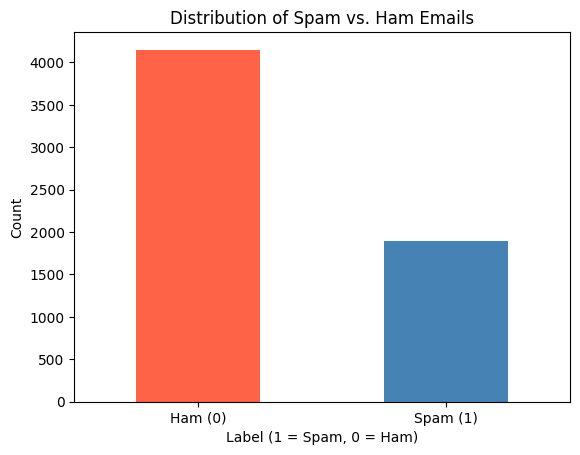

In [ ]:
# Count the distribution of spam (1) and ham (0) emails
df['Label'].value_counts().plot(kind='bar', color=['#FF6347', '#4682B4'])

# Add labels and title
plt.title('Distribution of Spam vs. Ham Emails')
plt.xlabel('Label (1 = Spam, 0 = Ham)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham (0)', 'Spam (1)'], rotation=0)
plt.show()

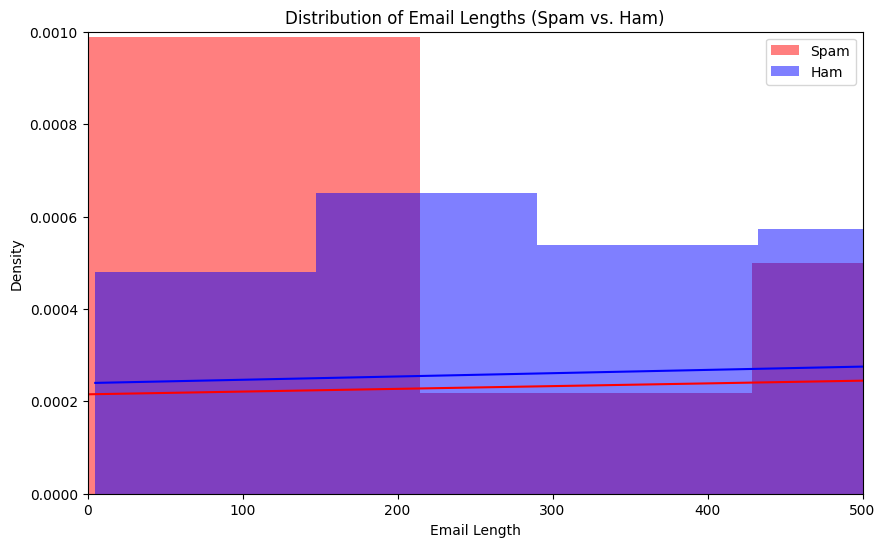

In [ ]:
# Visualize the distribution of email lengths for spam (1) vs. ham (0)
plt.figure(figsize=(10, 6))

sns.histplot(df[df['Label'] == 1]['email_length'], color='red', kde=True, label='Spam', stat='density', linewidth=0)
sns.histplot(df[df['Label'] == 0]['email_length'], color='blue', kde=True, label='Ham', stat='density', linewidth=0)

# Add labels and title
plt.legend()
plt.title('Distribution of Email Lengths (Spam vs. Ham)')
plt.xlabel('Email Length')
plt.ylabel('Density')

# Adjust x-axis and y-axis limits to zoom in
plt.xlim(0, 500)  # Adjust this value based on the range of email lengths
plt.ylim(0, 0.001)  # Adjust the y-limit to focus on the density curve

plt.show()


#Model: Random Forest

                                                Body  email_length
0  \nsave up to  on life insurance\nwhy spend mor...          1082
1   fight the risk of cancer\n slim down  guarant...           414
2   fight the risk of cancer\n slim down  guarant...           310
3  \n                                            ...          2237
4  i thought you might like these\n slim down  gu...           356
Training data shape: (3627, 5000)
Validation data shape: (1209, 5000)
Test data shape: (1210, 5000)
Validation Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       807
           1       0.90      0.97      0.93       402

    accuracy                           0.95      1209
   macro avg       0.94      0.96      0.95      1209
weighted avg       0.96      0.95      0.95      1209

Test Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       808
           1

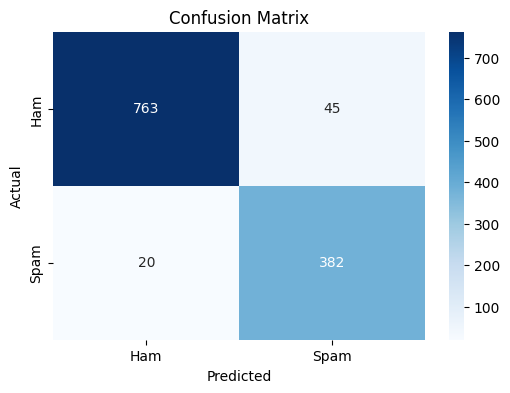

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re # used for text cleaning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Converts raw text into numerical features using TF-IDF
from sklearn.ensemble import RandomForestClassifier # builds multiple decision trees for classification
from sklearn.metrics import classification_report, confusion_matrix # Computes a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns # visualization

# Load dataset
df = pd.read_csv('/content/completeSpamAssassin.csv', encoding='latin-1')
df['Body'] = df['Body'].fillna('').astype(str)  # Handle (NaNs) missing values

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    return text

df['Body'] = df['Body'].apply(preprocess_text)  # Apply cleaning function

# Handle missing or non-string values by replacing NaNs with empty strings and ensuring all values are strings
df['Body'] = df['Body'].fillna('').astype(str)

# Calculate the length of each email
df['email_length'] = df['Body'].apply(len)

# Verify that the email length column has been created correctly
print(df[['Body', 'email_length']].head())

# Define Features and Labels
X = df['Body'] # cleaned email text
y = df['Label'] # labels (spam or not spam)

# Split Data (60% Train, 20% Validation, 20% Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# TF-IDF Vectorization , Converts raw text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Print dataset shapes after transformation
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Validation data shape: {X_val_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")

# Train Random Forest Model trained with 100 decision trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_val_pred = rf_classifier.predict(X_val_tfidf)
y_test_pred = rf_classifier.predict(X_test_tfidf)

# Evaluation Metrics
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Model : MLP - Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Convert sparse TF-IDF matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_val_dense = X_val_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dense, y_train, validation_data=(X_val_dense, y_val), epochs=10, batch_size=32)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_dense, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
y_pred = (model.predict(X_test_dense) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7851 - loss: 0.4200 - val_accuracy: 0.9595 - val_loss: 0.0903
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9621 - loss: 0.0707 - val_accuracy: 0.9636 - val_loss: 0.0951
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9652 - loss: 0.0642 - val_accuracy: 0.9562 - val_loss: 0.0984
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9609 - loss: 0.0668 - val_accuracy: 0.9595 - val_loss: 0.1021
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9606 - loss: 0.0653 - val_accuracy: 0.9611 - val_loss: 0.1006
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9635 - loss: 0.0599 - val_accuracy: 0.9620 - val_loss: 0.1059
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9646 - loss: 0.0627 - val_accuracy: 0.9611 - val_loss: 0.1036
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9612 - loss: 0.0632 - val_accu

#Model : K Nearest Neighbor

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Load and preprocess dataset
df = pd.read_csv('/content/completeSpamAssassin.csv', encoding='latin-1')
df['Body'] = df['Body'].fillna('').astype(str)

# Convert text to numerical features using TF-IDF with optimized settings
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_text_features = vectorizer.fit_transform(df['Body'])

# Convert sparse matrix to dense array (for tree-based KNN)
X = X_text_features.toarray()

# Target labels
y = df['Label'].values

# Split dataset (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize features using MaxAbsScaler (supports high-dimensional data)
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Check class balance
class_counts = Counter(y_train)

# Optimize `k` using GridSearchCV (reduce search space for faster execution)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 18]}
grid_search = GridSearchCV(KNeighborsClassifier(metric='cosine', weights='distance'), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k found: {best_k}")

# Train KNN classifier with best k
knn = KNeighborsClassifier(n_neighbors=best_k, metric='cosine', weights='distance', n_jobs=-1)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Return results
best_k, class_counts, accuracy

Best k found: 5


(5, Counter({0: 2535, 1: 1092}), 0.9090909090909091)

#Model : Naïve Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model on the TF-IDF transformed training data
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_val_pred = nb_model.predict(X_val_tfidf)

# Evaluate the model's performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print the classification report for more detailed metrics
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Display the confusion matrix
print("Confusion Matrix (Validation):")
print(confusion_matrix(y_val, y_val_pred))

# Evaluate on the test set for final model performance
y_test_pred = nb_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")



Validation Accuracy: 0.9123
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       807
           1       0.98      0.75      0.85       402

    accuracy                           0.91      1209
   macro avg       0.93      0.87      0.89      1209
weighted avg       0.92      0.91      0.91      1209

Confusion Matrix (Validation):
[[800   7]
 [ 99 303]]
Test Accuracy: 0.9140


#Model : Logistic Regression

Optimal Threshold: 0.40

Final Model Performance (Optimal Threshold):
              precision    recall  f1-score   support

         Ham       0.98      0.94      0.96       808
        Spam       0.89      0.97      0.93       402

    accuracy                           0.95      1210
   macro avg       0.94      0.96      0.95      1210
weighted avg       0.95      0.95      0.95      1210



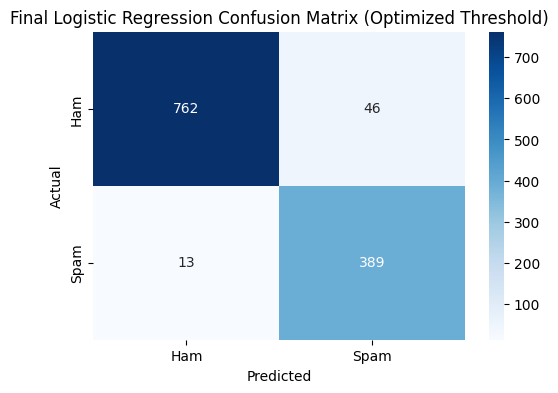

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/completeSpamAssassin.csv")

# Extract features and labels
X = df['Body']  # Email text
y = df['Label']  # Spam (1) or Ham (0)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test = X_test.fillna('').astype(str)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = log_reg.predict_proba(X_test_tfidf)[:, 1]

# Tune threshold
thresholds = np.arange(0.40, 0.60, 0.02)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_prob > threshold).astype(int)
    acc = accuracy_score(y_test, y_pred_adjusted)
    prec = precision_score(y_test, y_pred_adjusted)
    rec = recall_score(y_test, y_pred_adjusted)
    results.append((threshold, acc, prec, rec))

df_results = pd.DataFrame(results, columns=['Threshold', 'Accuracy', 'Precision', 'Recall'])
optimal_threshold = df_results.iloc[df_results['Recall'].idxmax()]['Threshold']

# Final evaluation
y_pred_best = (y_prob > optimal_threshold).astype(int)
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print("\nFinal Model Performance (Optimal Threshold):")
print(classification_report(y_test, y_pred_best, target_names=["Ham", "Spam"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Logistic Regression Confusion Matrix (Optimized Threshold)')
plt.show()
